# Credit Card Analysis

Clustering Aggorithms considered:
    - K-Means clustering
    - Hierarchial Clsutering
    - DB Scan
    - Spectral Clsutering
    - GMM Clustering

### Importing Libraries

In [1]:
# Data Manipulation libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the data


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# displaying first five rows of the dataframe
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# overview
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Data Pre-processing

In [5]:
# getting the shape of the data
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# viewing the columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
# changing the columns into lower case
df.columns = [i.lower() for i in df.columns]

In [10]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [11]:
# dropping the customer_if from the data
df = df.drop(['cust_id'],axis=1)

In [12]:
df.shape

(8950, 17)

In [13]:
df[['balance','balance_frequency','purchases','oneoff_purchases','installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']].nunique()

balance                             8871
balance_frequency                     43
purchases                           6203
oneoff_purchases                    4014
installments_purchases              4452
cash_advance                        4323
purchases_frequency                   47
oneoff_purchases_frequency            47
purchases_installments_frequency      47
cash_advance_frequency                54
cash_advance_trx                      65
purchases_trx                        173
credit_limit                         205
payments                            8711
minimum_payments                    8636
prc_full_payment                      47
tenure                                 7
dtype: int64

/home/asus/.local/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


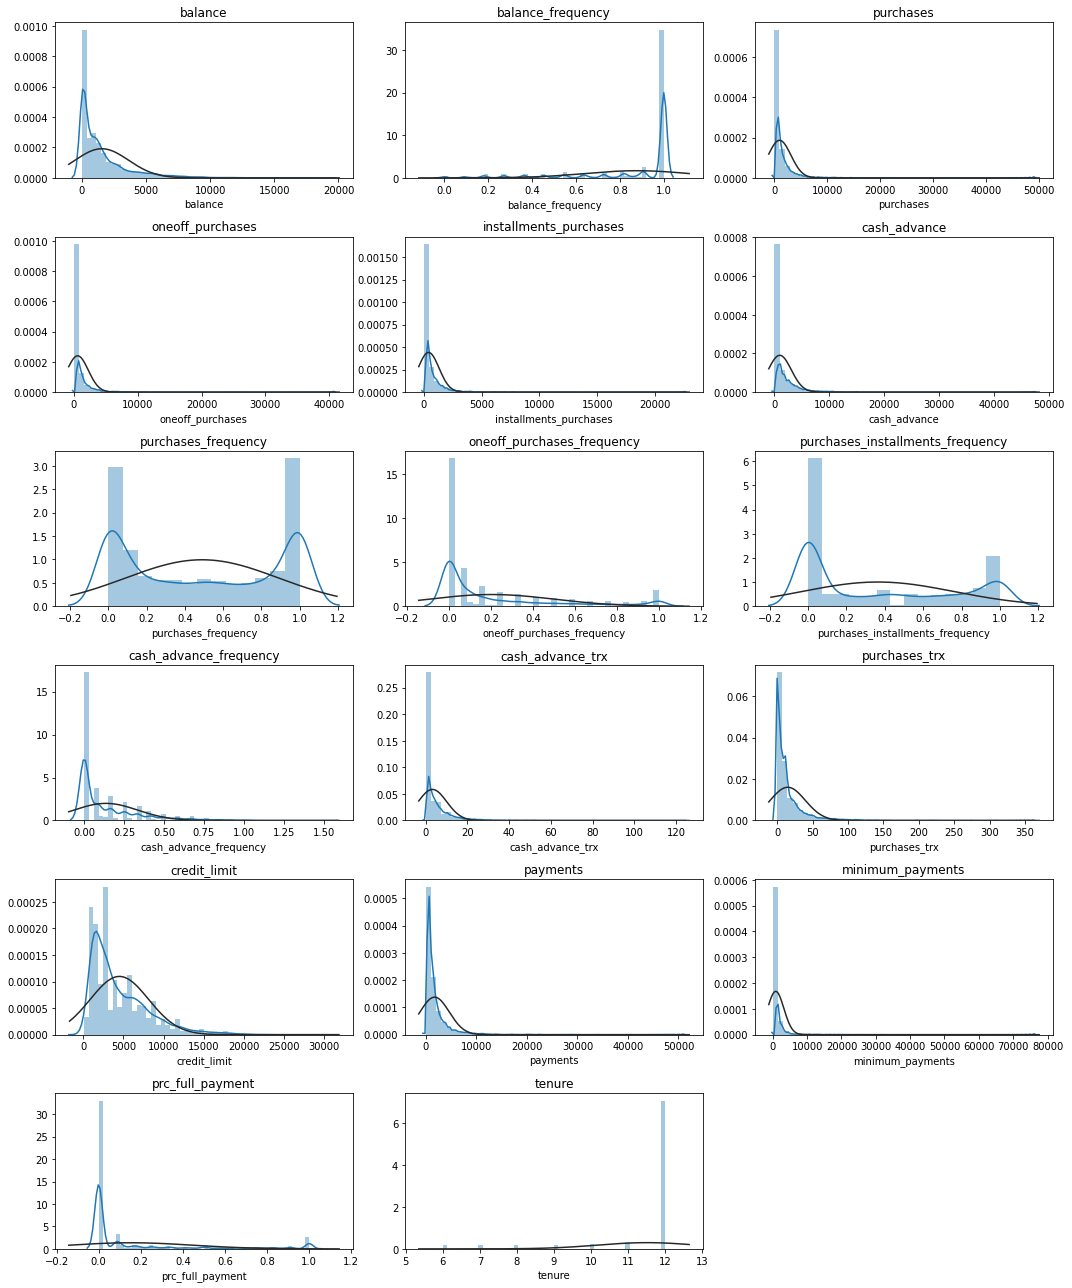

In [14]:
# variable check
from scipy.stats import norm

variables = ['balance','balance_frequency','purchases','oneoff_purchases','installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[variables[i]].dropna(),fit=norm)
    plt.title(variables[i])
    
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

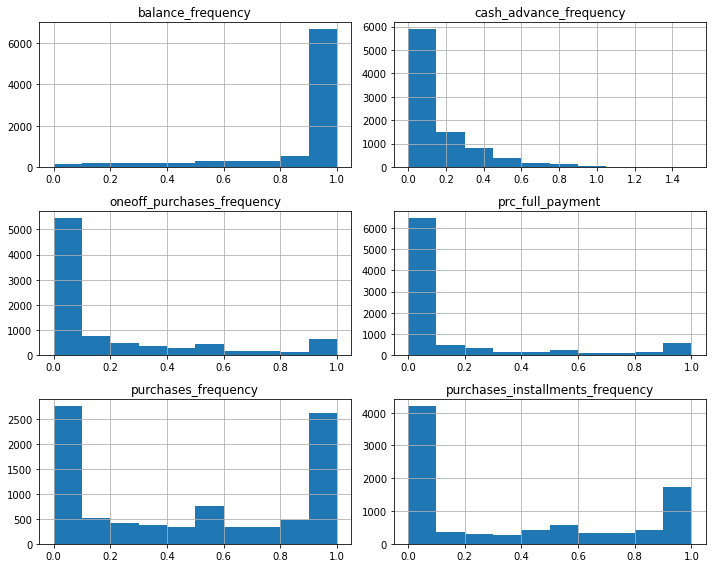

In [15]:
# frequency varibales
df[['balance_frequency','purchases_frequency','oneoff_purchases_frequency','purchases_installments_frequency', 'cash_advance_frequency','prc_full_payment']].hist(figsize=(10,8))
plt.tight_layout()

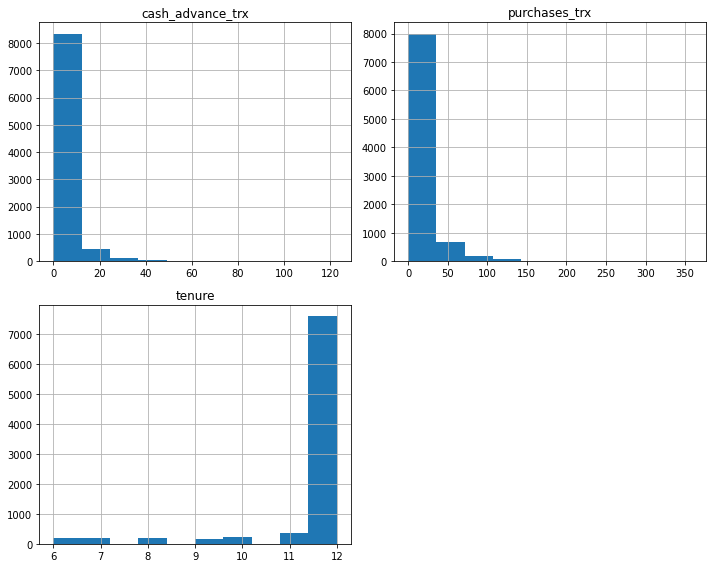

In [16]:
#int. values in histogram

df[['tenure','cash_advance_trx', 'purchases_trx']].hist(figsize=(10,8))
plt.tight_layout()

Text(0, 0.5, 'BALANCE')

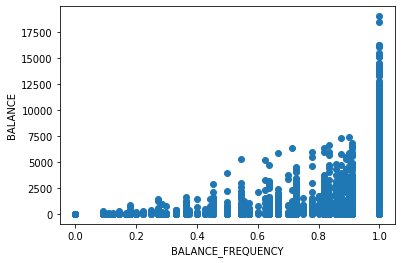

In [17]:
# plotting the graph bwtween balance and balance frequency
plt.scatter(df['balance_frequency'], df['balance'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

Text(0.5, 1.0, 'Correlation Matrix')

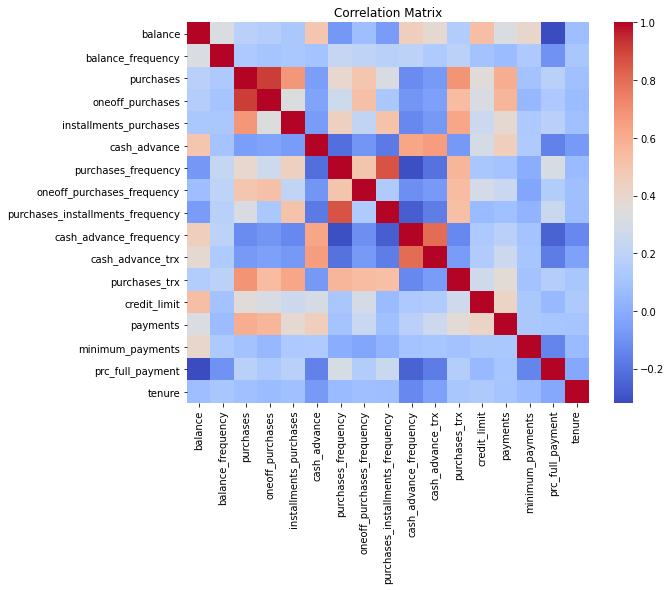

In [18]:
# correlation Matrix
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')

### Outliers

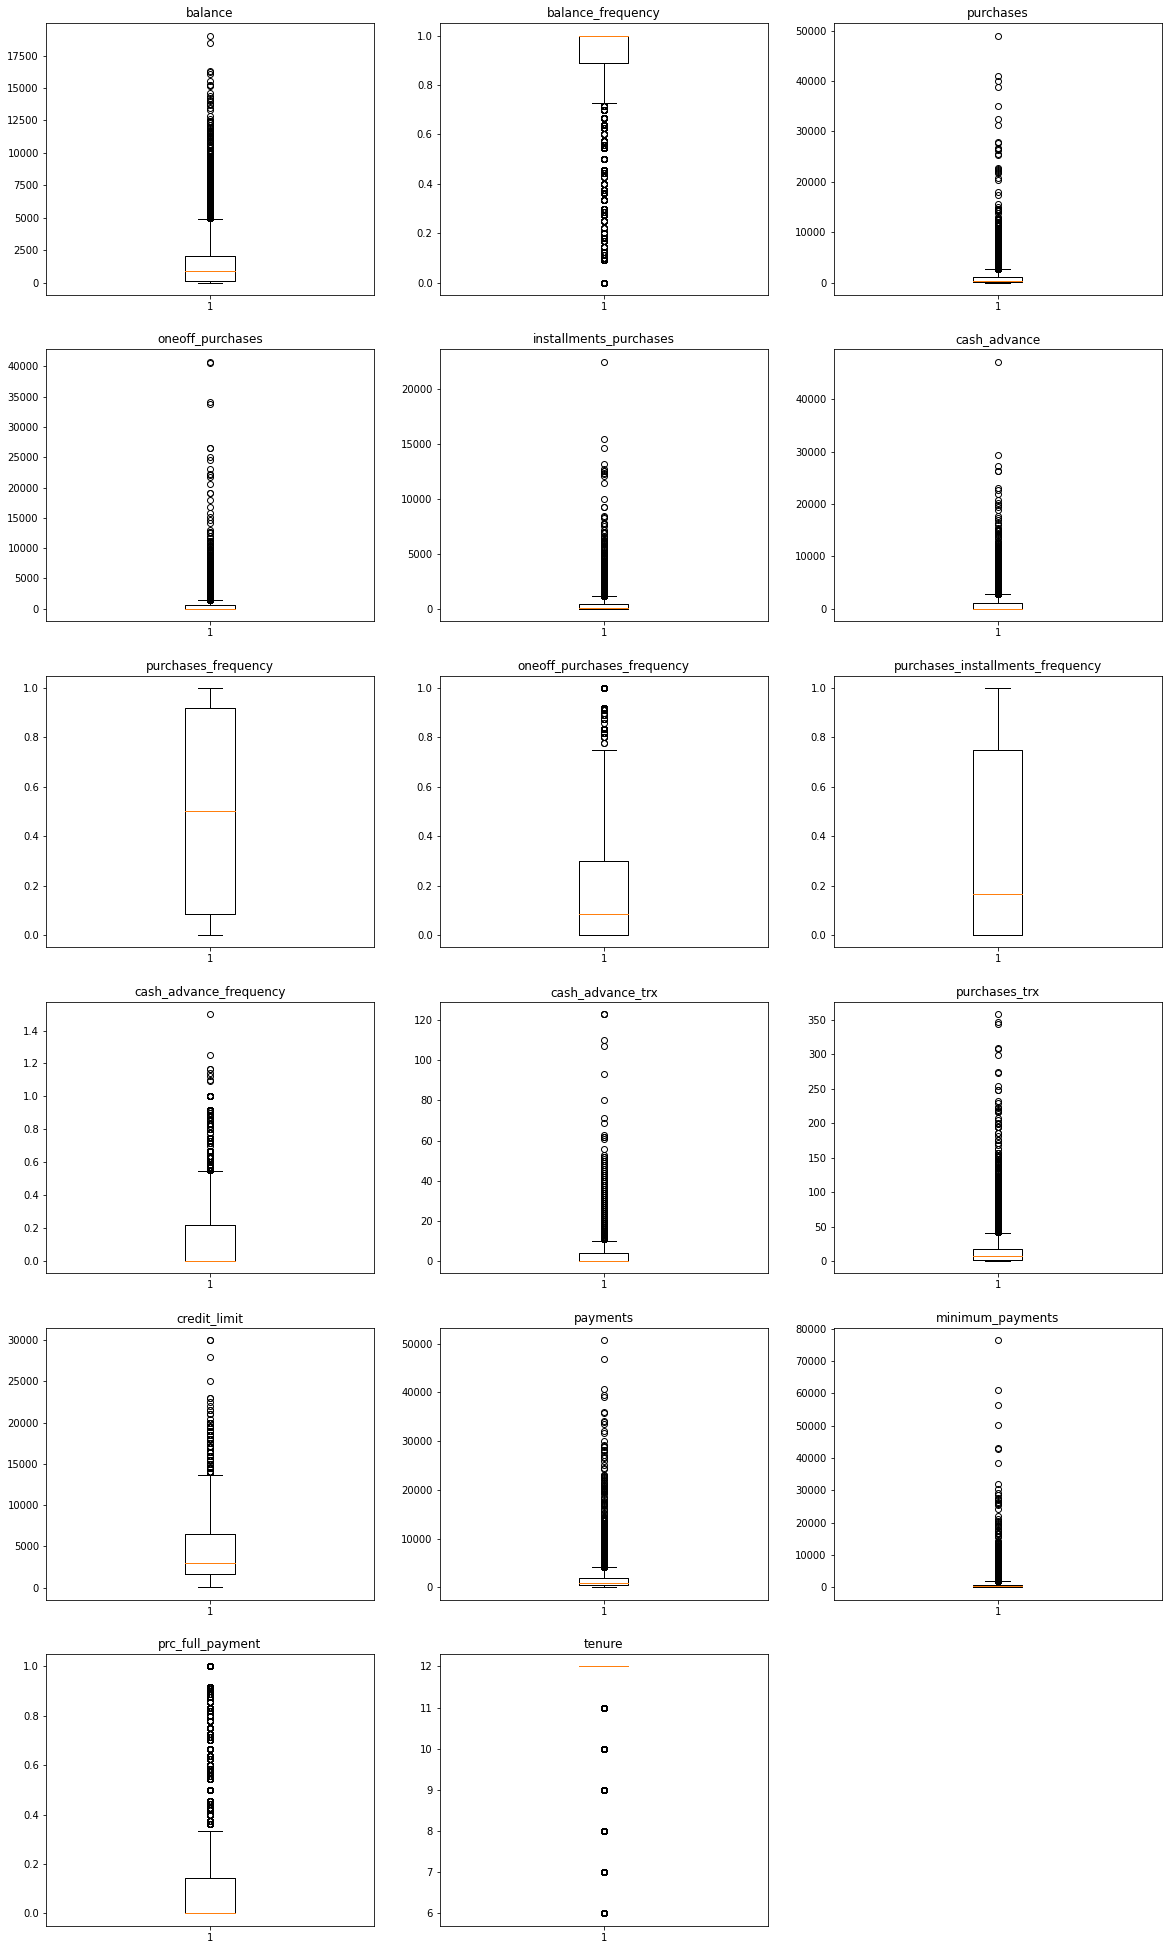

In [19]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    plt.boxplot(df[variables[i]].dropna())
    plt.title(variables[i])

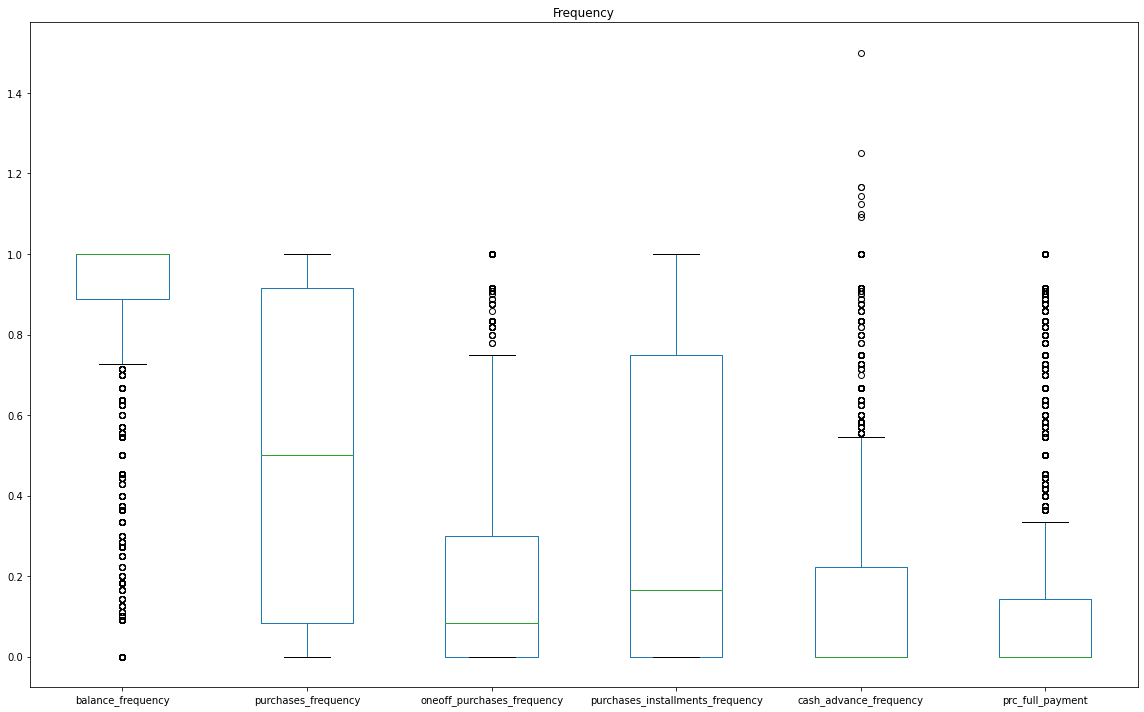

In [20]:
# frequency variables analysis
df[['balance_frequency','purchases_frequency','oneoff_purchases_frequency','purchases_installments_frequency', 'cash_advance_frequency','prc_full_payment']].plot.box(figsize=(16,10),title='Frequency',legend=True)
plt.tight_layout()

In [21]:
# checking columns having missing values
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [22]:
# filling the missing values by substituting with the mean
df['minimum_payments'].fillna(df['minimum_payments'].mean(),inplace=True)
df['credit_limit'].fillna(df['credit_limit'].mean(),inplace=True)


In [23]:
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [24]:
# applying iqr in dataset
cols = list(df)
irq_score = {}

for c in cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    score = q3 - q1
    outliers = df[(df[c] < q1 - 1.5 * score) | (df[c] > q3 + 1.5 * score)][c]
    values = df[(df[c] >= q1 - 1.5 * score) | (df[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
balance,128.281915,2054.140036,1925.858120,695,7183.206924,2193.426633,6533.312256,1564.474828,2081.531879,873.385231
balance_frequency,0.888889,1.000000,0.111111,1493,0.396616,0.194740,0.454545,0.877271,0.236904,1.000000
purchases,39.635000,1110.130000,1070.495000,808,5662.898193,4739.024603,4220.550000,1003.204834,2136.634782,361.280000
oneoff_purchases,0.000000,577.405000,577.405000,1013,3546.976594,3678.788638,2475.930000,592.437371,1659.887917,38.000000
installments_purchases,0.000000,468.637500,468.637500,867,2364.116021,1857.838527,1800.000000,411.067645,904.338115,89.000000
cash_advance,0.000000,1113.821139,1113.821139,1030,5446.979628,3470.164991,4325.290526,978.871112,2097.163877,0.000000
purchases_frequency,0.083333,0.916667,0.833334,0,NaN,NaN,NaN,0.490351,0.401371,0.500000
oneoff_purchases_frequency,0.000000,0.300000,0.300000,782,0.952398,0.065798,1.000000,0.202458,0.298336,0.083333
purchases_installments_frequency,0.000000,0.750000,0.750000,0,NaN,NaN,NaN,0.364437,0.397448,0.166667
cash_advance_frequency,0.000000,0.222222,0.222222,525,0.710399,0.137328,0.666667,0.135144,0.200121,0.000000


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [26]:
df_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Determining the number of clusters with the Elbow Method


In [27]:
from sklearn.cluster import KMeans
css = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    css.append(kmeans.inertia_)

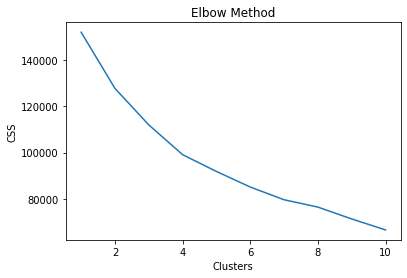

In [28]:
plt.plot(cluster_list, css)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('CSS')
plt.show()

### Determining the number of clusters with the Silhoutte scores Method

In [29]:
from sklearn.metrics import silhouette_score

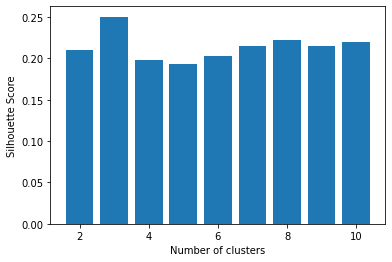

In [30]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [31]:
db_default = KMeans(n_clusters=3, init='k-means++').fit(df_std) 
labels = db_default.labels_ 

### PCA-Dimension Reduction

In [32]:

kmeans_       = KMeans(n_clusters=3, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_

In [33]:
# Normalizing the Data 
df_nor = normalize(df_std) 

# View the new feature data's shape 
df_nor.shape 

(8950, 17)

In [34]:
from sklearn.decomposition import PCA 
# PCA 2 dimensions

pca = PCA(n_components=2).fit(df_nor)

df_pca2 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

original shape:    (8950, 17)
transformed shape: (8950, 2)


,A1,A2
0,-0.489826,-0.679679
1,-0.518791,0.545008
2,0.330885,0.268980
3,-0.482374,-0.092113
4,-0.563289,-0.481915


### K-Means Clustering

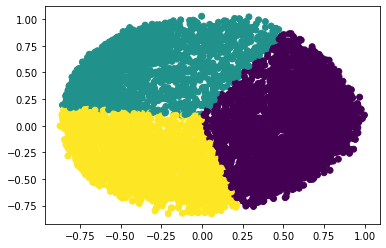

In [35]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=3, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

In [36]:
print(pca.explained_variance_)

[0.28409283 0.1799108 ]


### Hierarchial Clustering

In [37]:
# importing the required libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

In [38]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative))))
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [39]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.840813,average,2
4,4,0.808091,average,4
2,2,0.786555,complete,2
5,4,0.779261,complete,4
7,6,0.756536,average,6
10,8,0.709597,average,8
13,10,0.669882,average,10
16,12,0.668982,average,12
19,14,0.660499,average,14
8,6,0.659815,complete,6


### DB Scan

In [40]:
# importing the required libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [41]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))))
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [42]:
df_dbscan.sort_values('sil_score', ascending=False).head()

,eps,min_samples,sil_score,number_of_clusters
85,1.9,5,0.461593,2
86,1.9,6,0.455942,2
87,1.9,7,0.450568,2
88,1.9,8,0.447075,2
89,1.9,9,0.442959,2


### Spectral Clsutering

In [43]:
# importing the required libraries
from sklearn import cluster 
from sklearn.cluster import SpectralClustering

In [44]:
silhouette_list_spectral= []

for cluster in range(2,10):
    for neighbours in np.arange (3,10,2):
        spectral = SpectralClustering(n_clusters=cluster, affinity="nearest_neighbors",n_neighbors=neighbours, assign_labels='discretize',
                                      random_state=40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std,spectral, metric='euclidean')
        silhouette_list_spectral.append((cluster,sil_score, neighbours))

    
df_spectral= pd.DataFrame(silhouette_list_spectral, columns=['cluster', 'sil_score', 'neighbours'] )

/home/asus/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/asus/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/asus/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/asus/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/asus/.loca

In [45]:
df_spectral.sort_values('sil_score', ascending= False)

,cluster,sil_score,neighbours
2,2,0.183570,7
3,2,0.183292,9
1,2,0.179584,5
7,3,0.157830,9
6,3,0.155333,7
0,2,0.106593,3
4,3,0.082706,3
19,6,0.062498,9
11,4,0.057035,9
15,5,0.053066,9


### Gaussian Mixture Model (GMM)

In [46]:
# importing the required library
from sklearn.mixture import GaussianMixture

In [47]:
siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm))))
        
df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])

In [48]:
df_gmm.sort_values('sil_score', ascending=False).tail()

,cluster,sil_score,covariance_type,number_of_clusters
16,10,-0.003084,full,10
26,14,-0.009927,diag,14
36,20,-0.024542,full,20
38,20,-0.048752,diag,20
34,18,-0.054446,diag,18


### Comparing the results

In [49]:
kmeans_ = KMeans(n_clusters=3, random_state=40).fit_predict(df_std)

In [50]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=7).fit_predict(df_std)

In [51]:
dbscan  = DBSCAN(eps=9.5, min_samples=1).fit_predict(df_std)

In [52]:
spectral_  = SpectralClustering(n_clusters=7, affinity="rbf", n_neighbors=5, assign_labels='discretize',
                                  random_state=40).fit_predict(df_nor)

In [53]:
gmm_ = GaussianMixture(n_components=10, covariance_type='spherical', random_state=40).fit_predict(df_std)

In [54]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_std, dbscan, metric='euclidean')
Spectral_Silhouette_Score     = metrics.silhouette_score(df_std, spectral_, metric='euclidean')
GMM_Silhouette_Score          = metrics.silhouette_score(df_std, gmm_, metric='euclidean')


In [55]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Hierarchical',Hierarchical_Silhouette_Score ], ['DBSCAN', DBSCAN_Silhouette_Score], 
                                 ['Spectral', Spectral_Silhouette_Score],  ['GMM', GMM_Silhouette_Score]]
                                 
                                

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.756460
2,DBSCAN,0.751460
0,KMeans,0.250508
3,Spectral,0.138689
4,GMM,0.114316
